In [2]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 5.4 MB/s 
     |████████████████████████████████| 511.7 MB 6.9 kB/s 
     |████████████████████████████████| 1.6 MB 38.3 MB/s 
     |████████████████████████████████| 5.8 MB 38.4 MB/s 
     |████████████████████████████████| 438 kB 51.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [18]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Import required libraries and packages

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
import nltk
import re
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Loading

In [22]:
# Loading the train data into the pandas dataframe
df = pd.read_csv('train.csv', names=['index', 'title', 'content'])
df

,index,title,content
0,1,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,1,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,1,Q-workshop,Q-workshop is a Polish company located in Poz...
3,1,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,1,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
559995,14,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,14,Science & Spirit,Science & Spirit is a discontinued American b...
559997,14,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...
559998,14,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...


In [23]:
# Looking at the distribution of the data for each class
df.groupby('index').count()

,title,content
index,,
1,40000,40000
2,40000,40000
3,40000,40000
4,40000,40000
5,40000,40000
6,40000,40000
7,40000,40000
8,40000,40000
9,40000,40000


In [24]:
# Loading the class details in the dataframe and resets the indices so that it matches with the train dataframe
classes = pd.read_csv('classes.txt',names = ['Class'])
classes.index += 1
classes.reset_index(inplace=True)
classes

,index,Class
0,1,Company
1,2,EducationalInstitution
2,3,Artist
3,4,Athlete
4,5,OfficeHolder
5,6,MeanOfTransportation
6,7,Building
7,8,NaturalPlace
8,9,Village
9,10,Animal


## Preprocessing

In [25]:
def pattern_count(pattern):
  counter = 0
  for i in df.content:
    if re.findall(pattern, i):
      counter += 1
  print('Data Samples which contains '+ pattern +' : - ',counter)
  return counter

In [26]:
pattern_list = ["can\'t","what\'s","What\'s","\'ve ","n\'t","i\'m","I\'m","\'re","\'d","\'ll","c\+\+"
                ,"c \+\+","c \+ \+","c#","f#","g#"," e mail "," e \- mail "," e\-mail ",",000"]
pattern_counter = []
for i in pattern_list:
  pattern_counter.append(pattern_count(i))

Data Samples which contains can't : -  43
Data Samples which contains what's : -  5
Data Samples which contains What's : -  85
Data Samples which contains 've  : -  234
Data Samples which contains n't : -  2014
Data Samples which contains i'm : -  1
Data Samples which contains I'm : -  457
Data Samples which contains 're : -  394
Data Samples which contains 'd : -  208
Data Samples which contains 'll : -  264
Data Samples which contains c\+\+ : -  0
Data Samples which contains c \+\+ : -  0
Data Samples which contains c \+ \+ : -  0
Data Samples which contains c# : -  1
Data Samples which contains f# : -  0
Data Samples which contains g# : -  1
Data Samples which contains  e mail  : -  0
Data Samples which contains  e \- mail  : -  0
Data Samples which contains  e\-mail  : -  34
Data Samples which contains ,000 : -  0


In [27]:
def clean_words(text):
  text = re.sub(r"can\'t", "cannot", text)
  text = re.sub(r"what\'s", "what is", text)
  text = re.sub(r"What\'s", "what is", text)
  text = re.sub(r"\'ve ", " have ", text)
  text = re.sub(r"n\'t", " not ", text)
  text = re.sub(r"i\'m", "i am ", text)
  text = re.sub(r"I\'m", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"c\+\+", "cplusplus", text)
  text = re.sub(r"c \+\+", "cplusplus", text)
  text = re.sub(r"c \+ \+", "cplusplus", text)
  text = re.sub(r"c#", "csharp", text)
  text = re.sub(r"f#", "fsharp", text)
  text = re.sub(r"g#", "gsharp", text)
  text = re.sub(r" e mail ", " email ", text)
  text = re.sub(r" e \- mail ", " email ", text)
  text = re.sub(r" e\-mail ", " email ", text)
  text = re.sub(r",000", '000', text)                   

  # text = ' '.join(text.split())
  return text

In [28]:
df['content'] = df.content.apply(clean_words)

In [29]:
for i in pattern_list:
  print(pattern_count(i))

Data Samples which contains can't : -  0
0
Data Samples which contains what's : -  0
0
Data Samples which contains What's : -  0
0
Data Samples which contains 've  : -  0
0
Data Samples which contains n't : -  0
0
Data Samples which contains i'm : -  0
0
Data Samples which contains I'm : -  0
0
Data Samples which contains 're : -  0
0
Data Samples which contains 'd : -  0
0
Data Samples which contains 'll : -  0
0
Data Samples which contains c\+\+ : -  0
0
Data Samples which contains c \+\+ : -  0
0
Data Samples which contains c \+ \+ : -  0
0
Data Samples which contains c# : -  0
0
Data Samples which contains f# : -  0
0
Data Samples which contains g# : -  0
0
Data Samples which contains  e mail  : -  0
0
Data Samples which contains  e \- mail  : -  0
0
Data Samples which contains  e\-mail  : -  0
0
Data Samples which contains ,000 : -  0
0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


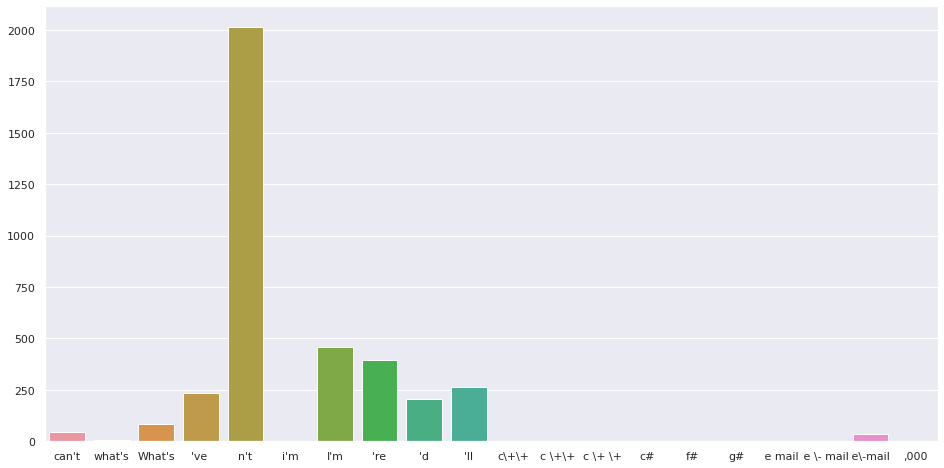

In [30]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(16,8)})

sns.barplot(pattern_list, pattern_counter)
plt.show()

In [31]:
pattern_digit = [' 1 ',' 2 ',' 3 ',' 4 ',' 5 ',' 6 ',' 7 ',' 8 ',' 9 ',' 0 ']

pattern_digit_counter = []
for i in pattern_digit:
  pattern_digit_counter.append(pattern_count(i))

Data Samples which contains  1  : -  12321
Data Samples which contains  2  : -  11218
Data Samples which contains  3  : -  10588
Data Samples which contains  4  : -  10189
Data Samples which contains  5  : -  10345
Data Samples which contains  6  : -  9525
Data Samples which contains  7  : -  9488
Data Samples which contains  8  : -  9070
Data Samples which contains  9  : -  8657
Data Samples which contains  0  : -  147


In [32]:
def clean_digits(text):
      text = re.sub(r" 1 ", " one ", text)
      text = re.sub(r" 2 ", " two ", text)
      text = re.sub(r" 3 ", " three ", text)
      text = re.sub(r" 4 ", " four ", text)
      text = re.sub(r" 5 ", " five ", text)
      text = re.sub(r" 6 ", " six ", text)
      text = re.sub(r" 7 ", " seven ", text)
      text = re.sub(r" 8 ", " eight ", text)
      text = re.sub(r" 9 ", " nine ", text)
      text = re.sub(r" 0 ", " zero ", text)
      return text

In [33]:
df['content'] = df.content.apply(clean_digits)

In [34]:
for i in pattern_digit:
  print(pattern_count(i))

Data Samples which contains  1  : -  0
0
Data Samples which contains  2  : -  0
0
Data Samples which contains  3  : -  0
0
Data Samples which contains  4  : -  0
0
Data Samples which contains  5  : -  0
0
Data Samples which contains  6  : -  0
0
Data Samples which contains  7  : -  0
0
Data Samples which contains  8  : -  0
0
Data Samples which contains  9  : -  0
0
Data Samples which contains  0  : -  0
0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


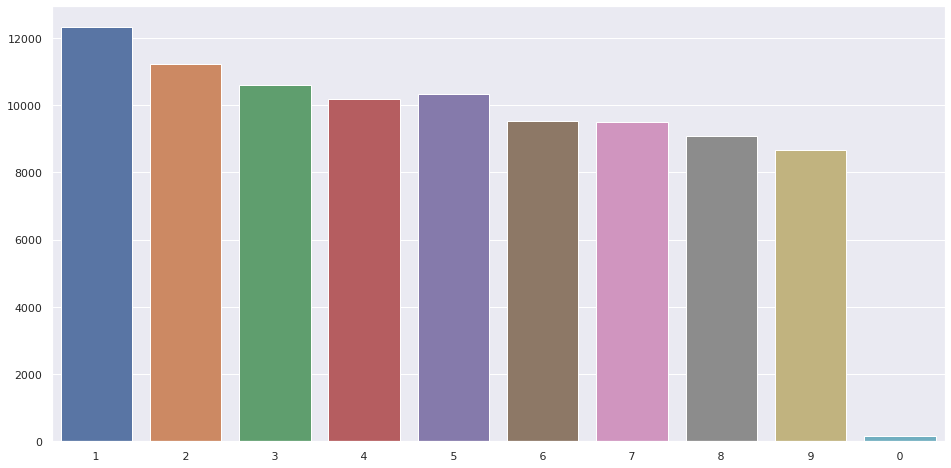

In [35]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(16,8)})

sns.barplot(pattern_digit, pattern_digit_counter)
plt.show()

In [36]:
pattern_symbol = ['&',"\|","=","\+","₹","\$"]
pattern_symbol_counter = []
for i in pattern_symbol:
  pattern_symbol_counter.append(pattern_count(i))

Data Samples which contains & : -  17127
Data Samples which contains \| : -  19
Data Samples which contains = : -  406
Data Samples which contains \+ : -  1300
Data Samples which contains ₹ : -  0
Data Samples which contains \$ : -  2864


In [37]:
def clean_symbols(text):
    text = re.sub(r"&", " and ", text)
    text = re.sub(r"\|", " or ", text)
    text = re.sub(r"=", " equal ", text)
    text = re.sub(r"\+", " plus ", text)
    text = re.sub(r"₹", " rs ", text)
    text = re.sub(r"\$", " dollar ", text)
    return text

In [38]:
df['content'] = df.content.apply(clean_symbols)

In [39]:
for i in pattern_symbol:
  print(pattern_count(i))

Data Samples which contains & : -  0
0
Data Samples which contains \| : -  0
0
Data Samples which contains = : -  0
0
Data Samples which contains \+ : -  0
0
Data Samples which contains ₹ : -  0
0
Data Samples which contains \$ : -  0
0


## Tokenization based on the Lemmantiazation and Steming

In [40]:
def lemma(sent):
  wnl = WordNetLemmatizer()
  sent = [wnl.lemmatize(word) for word in nltk.word_tokenize(sent.lower())]
  return ' '.join(sent)

In [41]:
df['content'] = df.content.apply(lemma)


In [42]:
df

,index,title,content
0,1,E. D. Abbott Ltd,abbott of farnham e d abbott limited wa a brit...
1,1,Schwan-Stabilo,schwan-stabilo is a german maker of pen for wr...
2,1,Q-workshop,q-workshop is a polish company located in pozn...
3,1,Marvell Software Solutions Israel,marvell software solution israel known a radla...
4,1,Bergan Mercy Medical Center,bergan mercy medical center is a hospital loca...
...,...,...,...
559995,14,Barking in Essex,barking in essex is a black comedy play direct...
559996,14,Science & Spirit,science and spirit is a discontinued american ...
559997,14,The Blithedale Romance,the blithedale romance ( 1852 ) is nathaniel h...
559998,14,Razadarit Ayedawbon,razadarit ayedawbon ( burmese : ရာဇာဓိရာဇ် အရေ...


In [43]:
def stem(sent):
  stemmer = SnowballStemmer("english")
  sent = [stemmer.stem(word) for word in nltk.word_tokenize(sent)]
  return ' '.join(sent)
df['content'] = df.content.apply(stem)


In [44]:
df

,index,title,content
0,1,E. D. Abbott Ltd,abbott of farnham e d abbott limit wa a britis...
1,1,Schwan-Stabilo,schwan-stabilo is a german maker of pen for wr...
2,1,Q-workshop,q-workshop is a polish compani locat in poznań...
3,1,Marvell Software Solutions Israel,marvel softwar solut israel known a radlan com...
4,1,Bergan Mercy Medical Center,bergan merci medic center is a hospit locat in...
...,...,...,...
559995,14,Barking in Essex,bark in essex is a black comedi play direct by...
559996,14,Science & Spirit,scienc and spirit is a discontinu american bim...
559997,14,The Blithedale Romance,the blithedal romanc ( 1852 ) is nathaniel haw...
559998,14,Razadarit Ayedawbon,razadarit ayedawbon ( burmes : ရာဇာဓိရာဇ် အရေး...


---

## Random Sampling for the training

In [45]:
df1 = df[df['index']==1]
df2 = df[df['index']==2]
df3 = df[df['index']==3]
df4 = df[df['index']==4]
df5 = df[df['index']==5]
df6 = df[df['index']==6]
df7 = df[df['index']==7]
df8 = df[df['index']==8]
df9 = df[df['index']==9]
df10 = df[df['index']==10]
df11 = df[df['index']==11]
df12 = df[df['index']==12]
df13 = df[df['index']==13]
df14 = df[df['index']==14]


df1= df1.sample(100)
df2= df2.sample(100)
df3= df3.sample(100)
df4= df4.sample(100)
df5= df5.sample(100)
df6= df6.sample(100)
df7= df7.sample(100)
df8= df8.sample(100)
df9= df9.sample(100)
df10= df10.sample(100)
df11= df11.sample(100)
df12= df12.sample(100)
df13= df13.sample(100)
df14= df14.sample(100)

In [46]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14])

---

## Performing BERT classification on the data

In [47]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [48]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.9, name="dropout")(outputs['pooled_output'])
lf = tf.keras.layers.Dense(1, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [lf])

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(df['content'], df['index'], epochs=2, validation_split=0.2, batch_size=8)

Epoch 1/2
140/140 [==============================] - 669s 5s/step - loss: 0.0000e+00 - accuracy: 0.0893 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
140/140 [==============================] - 654s 5s/step - loss: 0.0000e+00 - accuracy: 0.0893 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


## Evaluating model

In [54]:
df_test = pd.read_csv('test.csv', names=['index', 'title', 'content'])
df_test

,index,title,content
0,1,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,1,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,1,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,1,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,1,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
...,...,...,...
69995,14,Energy Victory,Energy Victory: Winning the War on Terror by ...
69996,14,Bestiario,Bestiario is a book of 8 short stories writte...
69997,14,Wuthering Heights,Wuthering Heights is a novel by Emily Brontë ...
69998,14,L'Indépendant,L'Indépendant is a newspaper published in Lux...


In [55]:
df_test['content'] = df_test.content.apply(clean_digits)
df_test['content'] = df_test.content.apply(clean_words)
df_test['content'] = df_test.content.apply(clean_symbols)

In [56]:
df1 = df_test[df_test['index']==1]
df2 = df_test[df_test['index']==2]
df3 = df_test[df_test['index']==3]
df4 = df_test[df_test['index']==4]
df5 = df_test[df_test['index']==5]
df6 = df_test[df_test['index']==6]
df7 = df_test[df_test['index']==7]
df8 = df_test[df_test['index']==8]
df9 = df_test[df_test['index']==9]
df10 = df_test[df_test['index']==10]
df11 = df_test[df_test['index']==11]
df12 = df_test[df_test['index']==12]
df13 = df_test[df_test['index']==13]
df14 = df_test[df_test['index']==14]


df1= df1.sample(10)
df2= df2.sample(10)
df3= df3.sample(10)
df4= df4.sample(10)
df5= df5.sample(10)
df6= df6.sample(10)
df7= df7.sample(10)
df8= df8.sample(10)
df9= df9.sample(10)
df10= df10.sample(10)
df11= df11.sample(10)
df12= df12.sample(10)
df13= df13.sample(10)
df14= df14.sample(10)

df_test = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14])

In [57]:
df_test['content'] = df_test.content.apply(lemma)
df_test['content'] = df_test.content.apply(stem)

In [58]:
model.evaluate(df_test.content, df_test.index)

5/5 [==============================] - 68s 13s/step - loss: 3412775.2500 - accuracy: 0.0000e+00


[3412775.25, 0.0]

### Here, I am down sampling the data because my pc takes a long time to complete the training for the whole or 25% of the data. Therefore, I am not getting very accurate results which I wanted. However, I can use the TextCNN to get the accurate model.